In [1]:
require(data.table)
require(ggplot2)
require(TSrepr)
require(TSdist)
require(dtw)
require(Rcpp)

Loading required package: data.table

Warning message:
"package 'data.table' was built under R version 4.0.5"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Loading required package: TSrepr

Warning message:
"package 'TSrepr' was built under R version 4.0.5"
Loading required package: TSdist

Warning message:
"package 'TSdist' was built under R version 4.0.5"
Loading required package: proxy

Warning message:
"package 'proxy' was built under R version 4.0.5"

Attaching package: 'proxy'


The following objects are masked from 'package:stats':

    as.dist, dist


The following object is masked from 'package:base':

    as.matrix


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loaded TSdist v3.7. See ?TSdist for help, citation("TSdist") for use in publication.


Loading required package: dtw

Warning message:
"package 'dtw' was built under R version 4.0.5"
Loaded dtw v1.22-3. See ?

In [2]:
# assuming you have the data folder in your working directory in the following format:
# 'working_directory/ClassificationData/dataset_name/'
current_folder=getwd()
dataset='PowerCons'
main_path=sprintf('%s/ClassificationData/%s/%s',current_folder,dataset,dataset)

dist_path=sprintf('%s/ClassificationData/%s/distances/%s',current_folder,dataset,dataset)

train_data_path=sprintf('%s_TRAIN.txt',main_path)
traindata=as.matrix(fread(train_data_path))
traindata_rep = fread(train_data_path) ## for representations, class data needs to be hold.

test_data_path=sprintf('%s_TEST.txt',main_path)
testdata=as.matrix(fread(test_data_path))
testdata_rep = fread(test_data_path)
#first column is the class variable
trainclass=traindata[,1] # takes -1 and 1
testclass=testdata[,1] # takes -1 and 1

#drop first column
traindata=traindata[,2:ncol(traindata)]
testdata=testdata[,2:ncol(testdata)]

# instance characteristics
tlength=ncol(traindata)
n_series_train=nrow(traindata)
n_series_test=nrow(testdata)

In [3]:
##### K = 1  
## raw + euclidian
## raw + DTW
## raw + LCSS 
## raw + ERP 
##### K = 3 
## raw + euclidian 
## raw + DTW 
## raw + LCSS 
## raw + ERP 
##### K = 5
## raw + euclidian
## raw + DTW
## raw + LCSS 
## raw + ERP

### Representations

Prepare data as long format for representations 

In [4]:
setnames(traindata_rep,'V1','class')

traindata_rep <- traindata_rep[order(class)]

head(traindata_rep)

traindata_rep[,class:=as.character(class)]
traindata_rep[,id:=1:.N]
long_train=melt(traindata_rep,id.vars=c('id','class'))

long_train[,time:=as.numeric(gsub("\\D", "", variable))-1]

long_train=long_train[,list(id,class,time,value)]
long_train=long_train[order(id,time)]

long_train

class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.44,0.40,0.36,0.35,0.35,0.38,0.36,0.35,0.35,...,0.77,0.40,0.33,0.29,0.28,0.24,0.22,0.23,0.25,0.25
1,0.14,0.19,0.19,0.16,0.16,0.18,0.17,0.16,0.17,...,0.48,0.62,0.39,0.17,0.14,0.70,1.25,1.21,1.20,1.24
1,0.34,0.34,0.34,0.26,0.18,0.83,1.48,1.36,0.95,...,0.84,0.97,1.23,1.49,1.17,0.85,0.83,0.79,0.75,0.73
1,1.70,1.50,1.30,3.40,5.50,4.15,2.80,2.67,2.53,...,1.62,1.61,1.60,1.59,1.55,1.00,0.55,0.37,0.37,0.36
1,1.78,1.59,1.39,1.45,1.45,1.41,1.40,1.45,1.46,...,1.36,1.36,1.40,0.81,0.23,0.27,0.29,0.28,0.27,0.27
1,0.41,0.30,0.24,0.28,0.28,0.28,0.23,0.25,0.31,...,1.27,1.59,1.91,1.65,1.40,1.11,0.81,0.60,0.39,0.32


id,class,time,value
<int>,<chr>,<dbl>,<dbl>
1,1,1,0.44
1,1,2,0.40
1,1,3,0.36
1,1,4,0.35
1,1,5,0.35
1,1,6,0.38
1,1,7,0.36
1,1,8,0.35
1,1,9,0.35


#### Piecewise Aggregate Approximation

##### Segment Length = 5

In [5]:
# Piecewise Aggregate Approximation
segment_length=5

# sort long table just in case
long_train=long_train[order(id,time)]

paa_results <- vector('list',n_series_train)
for (i in 1:n_series_train){

data_ts=long_train[id==i]$value
paa_rep=repr_paa(data_ts, segment_length, meanC)
#plot(paa_rep,type='l')
paa_results[[i]] <- paa_rep 
}
paa_list <- vector('list', n_series_train)
for (i in 1:n_series_train) {
  
    paa_list[[i]] = as.data.table(t(paa_results[[i]]))
  
    }
paa_fit_5 <- rbindlist(paa_list) 
paa_fit_5


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.380,0.364,0.412,0.920,0.438,0.404,0.344,0.324,1.788,1.588,...,0.174,0.228,0.192,0.528,0.376,0.938,2.326,1.110,0.308,0.2375
0.168,0.170,0.158,0.164,0.170,0.166,0.162,0.628,0.678,0.162,...,0.160,0.196,0.508,1.338,0.674,0.260,0.234,0.328,0.404,1.2250
0.292,1.034,0.290,0.248,0.284,0.270,0.214,0.548,2.586,1.556,...,0.314,0.216,0.304,0.256,0.220,1.986,0.996,0.742,1.142,0.7750
2.680,2.928,1.582,0.180,0.196,0.238,0.214,0.178,0.686,1.406,...,0.254,0.508,0.538,1.224,0.572,1.792,1.508,1.526,1.470,0.4125
1.532,1.424,0.440,0.338,0.354,0.362,0.360,0.364,0.358,0.356,...,0.292,0.280,0.286,0.324,0.274,0.280,0.332,0.630,0.814,0.2775
0.302,0.276,0.302,0.336,0.282,0.282,0.336,0.314,0.278,0.290,...,1.266,0.314,0.204,0.256,0.216,0.204,0.234,1.728,1.532,0.5300
1.242,0.486,0.478,0.554,0.500,0.202,0.174,0.174,0.486,1.202,...,0.516,0.208,0.222,0.202,0.206,0.228,0.216,0.206,0.218,1.2525
0.938,0.370,0.436,0.980,0.154,0.164,0.166,0.142,0.170,0.316,...,0.174,0.176,0.170,0.174,0.166,0.162,0.194,2.588,3.468,4.4250
1.802,0.736,0.316,0.220,0.180,0.160,0.158,0.172,0.228,1.122,...,0.168,0.178,0.172,0.192,0.162,0.166,0.186,0.182,0.256,2.1600


#### Fused Lasso

In [6]:
require(genlasso)
lasso_results <- vector("list",n_series_train)

for(i in 1:n_series_train){
  selected_dt <- long_train[id == i]
  selected_dt <- as.matrix(selected_dt[,4], rownames=FALSE)
  flasso <- trendfilter(selected_dt, ord=0)
  cv <- cv.trendfilter(flasso)
     
    #print(paste0(i,'.Time Series' ))
    #print(paste0('minimum crossvalidated error:',cv$lambda.min))
    #print(paste0('1se error:',cv$lambda.min))
  lasso_results[[i]] <- predict.genlasso(flasso, cv$lambda.min)
  
}


Loading required package: genlasso

Warning message:
"package 'genlasso' was built under R version 4.0.5"
Loading required package: Matrix

Loading required package: igraph

Warning message:
"package 'igraph' was built under R version 4.0.5"

Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold

In [7]:
lasso_dt = vector('list', n_series_train)
for(i in seq(1:n_series_train)){
lasso_dt[[i]] =as.data.table(t(lasso_results[[i]]$fit))
}
lasso_fit_dt = rbindlist(lasso_dt)
head(lasso_fit_dt)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.44,0.40,0.36,0.35,0.35,0.38,0.36,0.35,0.35,0.38,...,0.77,0.40,0.33,0.29,0.28,0.24,0.22,0.23,0.25,0.25
0.14,0.19,0.19,0.16,0.16,0.18,0.17,0.16,0.17,0.17,...,0.48,0.62,0.39,0.17,0.14,0.70,1.25,1.21,1.20,1.24
0.34,0.34,0.34,0.26,0.18,0.83,1.48,1.36,0.95,0.55,...,0.84,0.97,1.23,1.49,1.17,0.85,0.83,0.79,0.75,0.73
1.70,1.50,1.30,3.40,5.50,4.15,2.80,2.67,2.53,2.49,...,1.62,1.61,1.60,1.59,1.55,1.00,0.55,0.37,0.37,0.36
1.78,1.59,1.39,1.45,1.45,1.41,1.40,1.45,1.46,1.40,...,1.36,1.36,1.40,0.81,0.23,0.27,0.29,0.28,0.27,0.27
0.41,0.30,0.24,0.28,0.28,0.28,0.23,0.25,0.31,0.31,...,1.27,1.59,1.91,1.65,1.40,1.11,0.81,0.60,0.39,0.32


#### Classification Trees

#### Max Depth 5

In [8]:
library(caret)
library(rpart)
predictions= vector('list', n_series_train)
for(j in 1:n_series_train){
   
selected_dt <- long_train[id == j]

ctrl1=trainControl(method='repeatedcv',number=10,repeats=5)
fit_tree=train(value~time, 
                   data= selected_dt,
                   method = "rpart",
                   control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = 5),
                   metric = 'RMSE',
                   trControl = ctrl1,
                   tuneGrid = expand.grid(cp = 0), 
    )
    
predictions[[j]] <- predict(fit_tree,selected_dt)

}
prediction_list = vector('list', n_series_train)
for(i in seq(1:n_series_train)){
prediction_list[[i]] = as.data.table(t(predictions[[i]]))
}

tree_fit_dt_5 = rbindlist(prediction_list)
tree_fit_dt_5

Warning message:
"package 'caret' was built under R version 4.0.5"
Loading required package: lattice



1,2,3,4,5,6,7,8,9,10,...,135,136,137,138,139,140,141,142,143,144
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3727273,0.3727273,0.3727273,0.3727273,0.3727273,0.3727273,0.3727273,0.3727273,0.3727273,0.3727273,...,0.3260000,0.3260000,0.3260000,0.3260000,0.3260000,0.3260000,0.3260000,0.3260000,0.3260000,0.3260000
0.1700000,0.1700000,0.1700000,0.1700000,0.1700000,0.1700000,0.1700000,0.1700000,0.1700000,0.1700000,...,0.7400000,0.7400000,0.7400000,0.7400000,0.7400000,0.7400000,0.7400000,0.7400000,0.7400000,0.7400000
0.6630000,0.6630000,0.6630000,0.6630000,0.6630000,0.6630000,0.6630000,0.6630000,0.6630000,0.6630000,...,0.8942857,0.8942857,0.8942857,0.8942857,0.8942857,0.8942857,0.8942857,0.8942857,0.8942857,0.8942857
2.7416667,2.7416667,2.7416667,2.7416667,2.7416667,2.7416667,2.7416667,2.7416667,2.7416667,2.7416667,...,1.0620000,1.0620000,1.0620000,1.0620000,1.0620000,1.0620000,1.0620000,1.0620000,1.0620000,1.0620000
1.4780000,1.4780000,1.4780000,1.4780000,1.4780000,1.4780000,1.4780000,1.4780000,1.4780000,1.4780000,...,0.6709091,0.6709091,0.6709091,0.6709091,0.6709091,0.6709091,0.6709091,0.6709091,0.6709091,0.6709091
0.2825000,0.2825000,0.2825000,0.2825000,0.2825000,0.2825000,0.2825000,0.2825000,0.2825000,0.2825000,...,1.4015385,1.4015385,1.4015385,1.4015385,1.4015385,1.4015385,1.4015385,1.4015385,1.4015385,1.4015385
0.8640000,0.8640000,0.8640000,0.8640000,0.8640000,0.8640000,0.8640000,0.8640000,0.8640000,0.8640000,...,0.6310000,0.6310000,0.6310000,0.6310000,0.6310000,0.6310000,0.6310000,0.6310000,0.6310000,0.6310000
0.6540000,0.6540000,0.6540000,0.6540000,0.6540000,0.6540000,0.6540000,0.6540000,0.6540000,0.6540000,...,3.5684615,3.5684615,3.5684615,3.5684615,3.5684615,3.5684615,3.5684615,3.5684615,3.5684615,3.5684615
1.2690000,1.2690000,1.2690000,1.2690000,1.2690000,1.2690000,1.2690000,1.2690000,1.2690000,1.2690000,...,1.0100000,1.0100000,1.0100000,1.0100000,1.0100000,1.0100000,1.0100000,1.0100000,1.0100000,1.0100000


#### Max Depth 7

In [9]:
library(caret)
library(rpart)
predictions= vector('list', n_series_train)
for(j in 1:n_series_train){
   
selected_dt <- long_train[id == j]

ctrl1=trainControl(method='repeatedcv',number=10,repeats=5)
fit_tree=train(value~time, 
                   data= selected_dt,
                   method = "rpart",
                   control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = 7),
                   metric = 'RMSE',
                   trControl = ctrl1,
                   tuneGrid = expand.grid(cp = 0), 
    )
    
predictions[[j]] <- predict(fit_tree,selected_dt)

}
prediction_list = vector('list', n_series_train)
for(i in seq(1:n_series_train)){
prediction_list[[i]] = as.data.table(t(predictions[[i]]))
}

tree_fit_dt_7 = rbindlist(prediction_list)
tree_fit_dt_7

1,2,3,4,5,6,7,8,9,10,...,135,136,137,138,139,140,141,142,143,144
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3727273,0.3727273,0.3727273,0.3727273,0.3727273,0.3727273,0.3727273,0.3727273,0.3727273,0.3727273,...,0.3260000,0.3260000,0.3260000,0.3260000,0.3260000,0.3260000,0.3260000,0.3260000,0.3260000,0.3260000
0.1700000,0.1700000,0.1700000,0.1700000,0.1700000,0.1700000,0.1700000,0.1700000,0.1700000,0.1700000,...,0.7400000,0.7400000,0.7400000,0.7400000,0.7400000,0.7400000,0.7400000,0.7400000,0.7400000,0.7400000
0.6630000,0.6630000,0.6630000,0.6630000,0.6630000,0.6630000,0.6630000,0.6630000,0.6630000,0.6630000,...,0.8942857,0.8942857,0.8942857,0.8942857,0.8942857,0.8942857,0.8942857,0.8942857,0.8942857,0.8942857
2.7416667,2.7416667,2.7416667,2.7416667,2.7416667,2.7416667,2.7416667,2.7416667,2.7416667,2.7416667,...,1.0620000,1.0620000,1.0620000,1.0620000,1.0620000,1.0620000,1.0620000,1.0620000,1.0620000,1.0620000
1.4780000,1.4780000,1.4780000,1.4780000,1.4780000,1.4780000,1.4780000,1.4780000,1.4780000,1.4780000,...,0.6709091,0.6709091,0.6709091,0.6709091,0.6709091,0.6709091,0.6709091,0.6709091,0.6709091,0.6709091
0.2825000,0.2825000,0.2825000,0.2825000,0.2825000,0.2825000,0.2825000,0.2825000,0.2825000,0.2825000,...,1.4015385,1.4015385,1.4015385,1.4015385,1.4015385,1.4015385,1.4015385,1.4015385,1.4015385,1.4015385
0.8640000,0.8640000,0.8640000,0.8640000,0.8640000,0.8640000,0.8640000,0.8640000,0.8640000,0.8640000,...,0.6310000,0.6310000,0.6310000,0.6310000,0.6310000,0.6310000,0.6310000,0.6310000,0.6310000,0.6310000
0.6540000,0.6540000,0.6540000,0.6540000,0.6540000,0.6540000,0.6540000,0.6540000,0.6540000,0.6540000,...,3.5684615,3.5684615,3.5684615,3.5684615,3.5684615,3.5684615,3.5684615,3.5684615,3.5684615,3.5684615
1.2690000,1.2690000,1.2690000,1.2690000,1.2690000,1.2690000,1.2690000,1.2690000,1.2690000,1.2690000,...,1.0100000,1.0100000,1.0100000,1.0100000,1.0100000,1.0100000,1.0100000,1.0100000,1.0100000,1.0100000


## Distance Calculations

#### Euclidian

In [10]:
large_number=100000

In [11]:
# raw + euclidian
dist_euc=as.matrix(dist(traindata))
diag(dist_euc)=large_number
fwrite(dist_euc,sprintf('%s_euc_raw_dist.csv',dist_path),col.names=F)


x being coerced from class: matrix to data.table



In [12]:
# fusedlasso + euclidian
dist_euc_lasso=as.matrix(dist(lasso_fit_dt))
diag(dist_euc_lasso)=large_number
fwrite(dist_euc_lasso,sprintf('%s_euc_raw_lasso_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [13]:
# tree( max depth = 5) + euclidian
dist_euc_tree5=as.matrix(dist(tree_fit_dt_5))
diag(dist_euc_tree5)=large_number
fwrite(dist_euc_tree5,sprintf('%s_euc_raw_tree_depth_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [14]:
# tree( max depth = 7) + euclidian
dist_euc_tree7=as.matrix(dist(tree_fit_dt_7))
diag(dist_euc_tree7)=large_number
fwrite(dist_euc_tree7,sprintf('%s_euc_raw_tree_depth_7_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [15]:
# PAA( segment length = 5) + euclidian
dist_euc_paa=as.matrix(dist(paa_fit_5))
diag(dist_euc_paa)=large_number
fwrite(dist_euc_paa,sprintf('%s_euc_raw_paa_segment_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



#### Dynamic Time Warping

In [16]:
# DTW
dist_dtw=as.matrix(dtwDist(traindata))
diag(dist_dtw)=large_number
fwrite(dist_dtw,sprintf('%s_dtw_raw_dist.csv',dist_path),col.names=F)


x being coerced from class: matrix to data.table



In [17]:
# fusedlasso + DTW
dist_dtw_lasso=as.matrix(dtwDist(lasso_fit_dt))
diag(dist_dtw_lasso)=large_number
fwrite(dist_dtw_lasso,sprintf('%s_dtw_raw_lasso_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [18]:
# tree ( max depth = 5) + DTW
dist_dtw_tree5=as.matrix(dtwDist(tree_fit_dt_5))
diag(dist_dtw_tree5)=large_number
fwrite(dist_dtw_tree5,sprintf('%s_dtw_raw_tree_depth_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [19]:
# tree ( max depth = 7) + DTW
dist_dtw_tree7=as.matrix(dtwDist(tree_fit_dt_7))
diag(dist_dtw_tree7)=large_number
fwrite(dist_dtw_tree7,sprintf('%s_dtw_raw_tree_depth_7_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [20]:
# PAA( segment length = 5) + DTW
dist_dtw_paa=as.matrix(dtwDist(paa_fit_5))
diag(dist_dtw_paa)=large_number
fwrite(dist_dtw_paa,sprintf('%s_dtw_raw_paa_segment_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



#### LCSS

In [21]:
# LCSS
dist_lcss=TSDatabaseDistances(traindata,distance='lcss',epsilon=0.05)
dist_lcss=as.matrix(dist_lcss)
diag(dist_lcss)=large_number
fwrite(dist_lcss,sprintf('%s_lcss_raw_epsilon_005.csv',dist_path),col.names=F)


x being coerced from class: matrix to data.table



In [22]:
# fusedlasso + LCSS
dist_lcss_lasso=TSDatabaseDistances(lasso_fit_dt,distance='lcss',epsilon=0.05)
dist_lcss_lasso=as.matrix(dist_lcss_lasso)
diag(dist_lcss_lasso)=large_number
fwrite(dist_lcss_lasso,sprintf('%s_lcss_raw_lasso_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [23]:
# tree ( max depth = 5) + LCSS
dist_lcss_tree5=TSDatabaseDistances(tree_fit_dt_5,distance='lcss',epsilon=0.05)
dist_lcss_tree5=as.matrix(dist_lcss_tree5)
diag(dist_lcss_tree5)=large_number
fwrite(dist_lcss_tree5,sprintf('%s_lcss_raw_tree_depth_5_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [24]:
# tree ( max depth = 7) + LCSS
dist_lcss_tree7=TSDatabaseDistances(tree_fit_dt_7,distance='lcss',epsilon=0.05)
dist_lcss_tree7=as.matrix(dist_lcss_tree7)
diag(dist_lcss_tree7)=large_number
fwrite(dist_lcss_tree7,sprintf('%s_lcss_raw_tree_depth_7_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [25]:
# PAA( segment length = 5) + LCSS
dist_lcss_paa=TSDatabaseDistances(paa_fit_5,distance='lcss',epsilon=0.05)
dist_lcss_paa=as.matrix(dist_lcss_paa)
diag(dist_lcss_paa)=large_number
fwrite(dist_lcss_paa,sprintf('%s_lcss_raw_paa_segment_5_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



#### ERP

In [26]:
# ERP 
dist_erp=TSDatabaseDistances(traindata,distance='erp',g=0.5)
dist_erp=as.matrix(dist_erp)
diag(dist_erp)=large_number
fwrite(dist_erp,sprintf('%s_erp_raw_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [27]:
# Fusedlasso + ERP 
dist_erp_lasso=TSDatabaseDistances(lasso_fit_dt,distance='erp',g=0.5)
dist_erp_lasso=as.matrix(dist_erp_lasso)
diag(dist_erp_lasso)=large_number
fwrite(dist_erp_lasso,sprintf('%s_erp_raw_lasso_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [28]:
# tree ( max depth = 5) + ERP 
dist_erp_tree5=TSDatabaseDistances(tree_fit_dt_5,distance='erp',g=0.5)
dist_erp_tree5=as.matrix(dist_erp_tree5)
diag(dist_erp_tree5)=large_number
fwrite(dist_erp_tree5,sprintf('%s_erp_raw_tree_dist_5_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [29]:
# tree ( max depth = 7) + ERP 
dist_erp_tree7=TSDatabaseDistances(tree_fit_dt_7,distance='erp',g=0.5)
dist_erp_tree7=as.matrix(dist_erp_tree7)
diag(dist_erp_tree7)=large_number
fwrite(dist_erp_tree7,sprintf('%s_erp_raw_tree_dist_7_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [30]:
# PAA( segment length = 5) + ERP 
dist_erp_paa=TSDatabaseDistances(paa_fit_5,distance='erp',g=0.5)
dist_erp_paa=as.matrix(dist_erp_paa)
diag(dist_erp_paa)=large_number
fwrite(dist_erp_paa,sprintf('%s_erp_raw_paa_segment_5_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [31]:
nn_classify_cv=function(dist_matrix,train_class,test_indices,k=1){
    
    test_distances_to_train=dist_matrix[test_indices,]
    test_distances_to_train=test_distances_to_train[,-test_indices]
    train_class=train_class[-test_indices]
    #print(str(test_distances_to_train))
    ordered_indices=apply(test_distances_to_train,1,order)
    if(k==1){
        nearest_class=as.numeric(trainclass[as.numeric(ordered_indices[1,])])
        nearest_class=data.table(id=test_indices,nearest_class)
    } else {
        nearest_class=apply(ordered_indices[1:k,],2,function(x) {trainclass[x]})
        nearest_class=data.table(id=test_indices,t(nearest_class))
    }
    
    long_nn_class=melt(nearest_class,'id')

    class_counts=long_nn_class[,.N,list(id,value)]
    class_counts[,predicted_prob:=N/k]
    wide_class_prob_predictions=dcast(class_counts,id~value,value.var='predicted_prob')
    wide_class_prob_predictions[is.na(wide_class_prob_predictions)]=0
    class_predictions=class_counts[,list(predicted=value[which.max(N)]),by=list(id)]
    
    
    return(list(prediction=class_predictions,prob_estimates=wide_class_prob_predictions))
    
}

In [32]:
# cv indices start here
require(TunePareto)

set.seed(15011998)
nof_rep=5
n_fold=10
cv_indices=generateCVRuns(trainclass, ntimes =nof_rep, nfold = n_fold, 
                          leaveOneOut = FALSE, stratified = TRUE)

str(cv_indices)

dist_folder=sprintf('%s/ClassificationData/%s/distances/',current_folder,dataset)
dist_files=list.files(dist_folder, full.names=T)

Loading required package: TunePareto

Warning message:
"package 'TunePareto' was built under R version 4.0.5"


List of 5
 $ Run  1:List of 10
  ..$ Fold  1 : int [1:18] 1 70 21 136 71 73 24 141 75 96 ...
  ..$ Fold  2 : int [1:18] 10 25 85 4 122 149 125 23 26 115 ...
  ..$ Fold  3 : int [1:18] 128 11 143 65 15 28 63 131 146 169 ...
  ..$ Fold  4 : int [1:18] 74 138 88 129 89 135 86 5 139 99 ...
  ..$ Fold  5 : int [1:18] 130 140 20 8 148 6 145 150 127 33 ...
  ..$ Fold  6 : int [1:18] 134 12 83 82 76 17 2 14 13 103 ...
  ..$ Fold  7 : int [1:18] 78 147 121 133 22 3 81 19 62 59 ...
  ..$ Fold  8 : int [1:18] 79 67 123 77 61 132 126 9 137 91 ...
  ..$ Fold  9 : int [1:18] 30 7 16 90 27 72 144 69 29 154 ...
  ..$ Fold  10: int [1:18] 64 87 80 142 18 68 84 66 124 47 ...
 $ Run  2:List of 10
  ..$ Fold  1 : int [1:18] 5 148 144 18 133 142 76 124 67 53 ...
  ..$ Fold  2 : int [1:18] 69 75 65 21 137 10 7 70 127 169 ...
  ..$ Fold  3 : int [1:18] 135 138 90 25 24 68 28 83 1 151 ...
  ..$ Fold  4 : int [1:18] 147 2 19 149 150 123 63 3 23 111 ...
  ..$ Fold  5 : int [1:18] 132 88 121 29 122 79 134 22 143

In [33]:
list.files(dist_folder)

[1] "PowerCons_dtw_raw_dist.csv"                      
 [2] "PowerCons_dtw_raw_lasso_dist.csv"                
 [3] "PowerCons_dtw_raw_paa_segment_5_dist.csv"        
 [4] "PowerCons_dtw_raw_tree_depth_5_dist.csv"         
 [5] "PowerCons_dtw_raw_tree_depth_7_dist.csv"         
 [6] "PowerCons_erp_raw_gap_005.csv"                   
 [7] "PowerCons_erp_raw_lasso_gap_005.csv"             
 [8] "PowerCons_erp_raw_paa_segment_5_gap_005.csv"     
 [9] "PowerCons_erp_raw_tree_dist_5_gap_005.csv"       
[10] "PowerCons_erp_raw_tree_dist_7_gap_005.csv"       
[11] "PowerCons_euc_raw_dist.csv"                      
[12] "PowerCons_euc_raw_lasso_dist.csv"                
[13] "PowerCons_euc_raw_paa_segment_5_dist.csv"        
[14] "PowerCons_euc_raw_tree_depth_5_dist.csv"         
[15] "PowerCons_euc_raw_tree_depth_7_dist.csv"         
[16] "PowerCons_lcss_raw_epsilon_005.csv"              
[17] "PowerCons_lcss_raw_lasso_epsilon_005.csv"        
[18] "PowerCons_lcss_raw_paa_segment_5_epsilon_005.csv"
[19] "PowerCons_lcss_raw_tree_depth_5_epsilon_005.csv" 
[20] "PowerCons_lcss_raw_tree_depth_7_epsilon_005.csv"

In [34]:
dist_files

[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_dtw_raw_dist.csv"                      
 [2] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_dtw_raw_lasso_dist.csv"                
 [3] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_dtw_raw_paa_segment_5_dist.csv"        
 [4] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_dtw_raw_tree_depth_5_dist.csv"         
 [5] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_dtw_raw_tree_depth_7_dist.csv"         
 [6] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_erp_raw_gap_005.csv"                   
 [7] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_erp_raw_lasso_gap_005.csv"             
 [8] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_erp_raw_paa_segment_5_gap_005.csv"     
 [9] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_erp_raw_tree_dist_5_gap_005.csv"       
[10] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_erp_raw_tree_dist_7_gap_005.csv"       
[11] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_euc_raw_dist.csv"                      
[12] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_euc_raw_lasso_dist.csv"                
[13] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_euc_raw_paa_segment_5_dist.csv"        
[14] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_euc_raw_tree_depth_5_dist.csv"         
[15] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_euc_raw_tree_depth_7_dist.csv"         
[16] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_lcss_raw_epsilon_005.csv"              
[17] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_lcss_raw_lasso_epsilon_005.csv"        
[18] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_lcss_raw_paa_segment_5_epsilon_005.csv"
[19] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_lcss_raw_tree_depth_5_epsilon_005.csv" 
[20] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_lcss_raw_tree_depth_7_epsilon_005.csv"

In [35]:
k_levels=c(1,3,5)
approach_file=list.files(dist_folder)
result=vector('list',length(dist_files)*nof_rep*n_fold*length(k_levels))
iter=1
for(m in 1:length(dist_files)){ #
    print(dist_files[m])
    dist_mat=as.matrix(fread(dist_files[m],header=FALSE))
    for(i in 1:nof_rep){
        this_fold=cv_indices[[i]]
        for(j in 1:n_fold){
            test_indices=this_fold[[j]]
            for(k in 1:length(k_levels)){
                current_k=k_levels[k]
                current_fold=nn_classify_cv(dist_mat,trainclass,test_indices,k=current_k)
                accuracy=sum(trainclass[test_indices]==current_fold$prediction$predicted)/length(test_indices)
                tmp=data.table(approach=approach_file[m],repid=i,foldid=j,
                               k=current_k,acc=accuracy)
                result[[iter]]=tmp
                iter=iter+1
                
            }
            
        }
    
    }   
    
}


[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_dtw_raw_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_dtw_raw_lasso_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_dtw_raw_paa_segment_5_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_dtw_raw_tree_depth_5_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_dtw_raw_tree_depth_7_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_erp_raw_gap_005.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_erp_raw_lasso_gap_005.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/PowerCons/distances/PowerCons_erp_raw_paa_segment_5_gap_005.csv"
[1] "C:/Users

In [36]:
overall_results=rbindlist(result)
overall_results[,list(avg_acc=mean(acc),sdev_acc=sd(acc),result_count=.N),by=list(approach,k)]



approach,k,avg_acc,sdev_acc,result_count
<chr>,<dbl>,<dbl>,<dbl>,<int>
PowerCons_dtw_raw_dist.csv,1,0.6800000,0.10442466,50
PowerCons_dtw_raw_dist.csv,3,0.7044444,0.11304441,50
PowerCons_dtw_raw_dist.csv,5,0.7033333,0.09759646,50
PowerCons_dtw_raw_lasso_dist.csv,1,0.4800000,0.09441443,50
PowerCons_dtw_raw_lasso_dist.csv,3,0.5288889,0.09864284,50
PowerCons_dtw_raw_lasso_dist.csv,5,0.5200000,0.08891723,50
PowerCons_dtw_raw_paa_segment_5_dist.csv,1,0.4922222,0.11446745,50
PowerCons_dtw_raw_paa_segment_5_dist.csv,3,0.5033333,0.08578040,50
PowerCons_dtw_raw_paa_segment_5_dist.csv,5,0.5366667,0.09091373,50


In [37]:
overall_results_summary <- overall_results[,list(avg_acc=mean(acc),sdev_acc=sd(acc),result_count=.N),by=list(approach,k)]


overall_results_summary[which.max(overall_results_summary$avg_acc),]

approach,k,avg_acc,sdev_acc,result_count
<chr>,<dbl>,<dbl>,<dbl>,<int>
PowerCons_euc_raw_dist.csv,5,0.8055556,0.1078022,50


In [44]:
result_path <- sprintf('%s/overall_summary/%s',current_folder,dataset)
fwrite(overall_results_summary,sprintf('%s_overall_result_summary.csv',result_path),col.names=T)  

Loading required package: overall_resultsplot2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'overall_resultsplot2'"


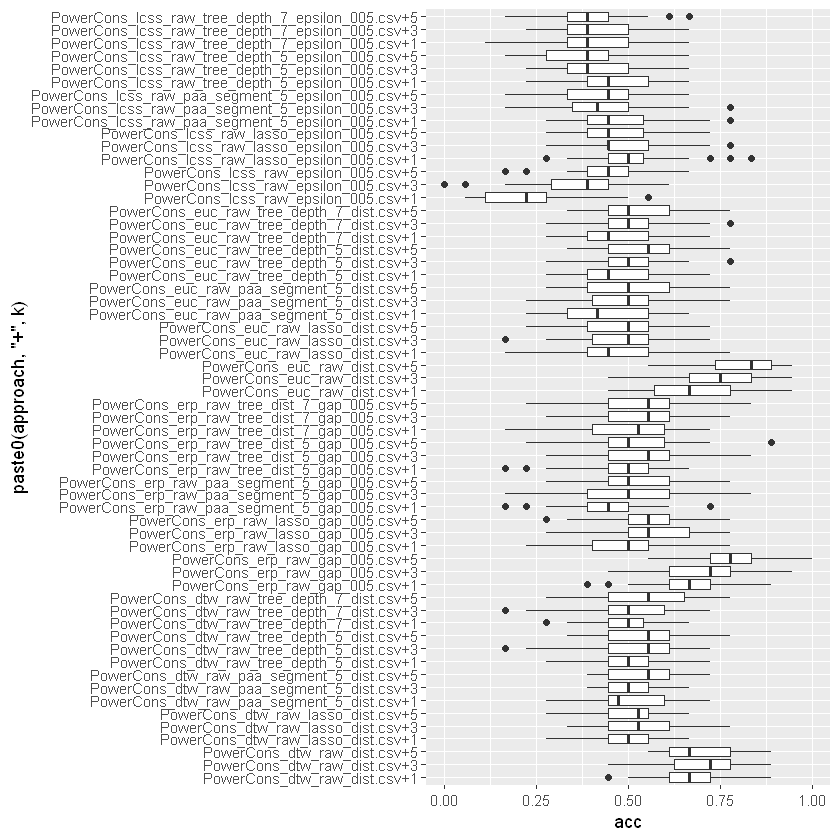

In [39]:
require(overall_resultsplot2)
ggplot(overall_results,aes(x=paste0(approach,'+',k), y=acc)) +
geom_boxplot()+
coord_flip()